![Texto](https://dadosaocubo.com/wp-content/uploads/2020/06/DADOS-AO-CUBO-Vers%C3%A3o-04-1.png) 

[__D³__](https://dadosaocubo.com/) by [__Tiago Dias__](https://www.linkedin.com/in/diasctiago/) 

# Classificação com scikit-learn

Nosso problema de classificação é identificar a especie de uma flor dada algumas características de entrada. Vamos trabalhar com um conhecido dataset de estudo o **iris**.

POST: [Classificação com scikit-learn](https://dadosaocubo.com/classificacao-com-scikit-learn)

## Importar bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from itertools import cycle


## Selecionar dataset

In [ ]:
# Selecionando os dados do iris
df = sns.load_dataset("iris")
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


Podemos selecionar os nossos dados de algumas fontes, hoje escolhi selecionar através da função **load_dataset()**. Essa função está disponível na biblioteca gráfica **seaborn**, que alem de ter os gráficos mais bonitos, ainda tem vários exemplos para que possamos fazer nossos testes.

## Verificar dados

In [ ]:
# Nome das flores
list(df['species'].unique())

['setosa', 'versicolor', 'virginica']

Aqui listamos os nossos tipos de espécies de flores do nosso conjunto de dados.

In [ ]:
# Resumo das observações
print('|-------------------------------|')
print('|     Resumo das observações    |')
print('|-------------------------------|')
print('|Classes                  |', len(df['species'].unique()), '  |')
print('|-------------------------------|')
print('|Observações por Classe   |', df['species'].value_counts().unique()[0], ' |')
print('|-------------------------------|')
print('|Total observações        |', df.shape[0], '|')
print('|-------------------------------|')
print('|Dimensionalidade         |', df.shape[1] - 1, '  |')
print('|-------------------------------|')

|-------------------------------|
|     Resumo das observações    |
|-------------------------------|
|Classes                  | 3   |
|-------------------------------|
|Observações por Classe   | 50  |
|-------------------------------|
|Total observações        | 150 |
|-------------------------------|
|Dimensionalidade         | 4   |
|-------------------------------|


Aqui está um resumo com as principais informações dos nossos dados.

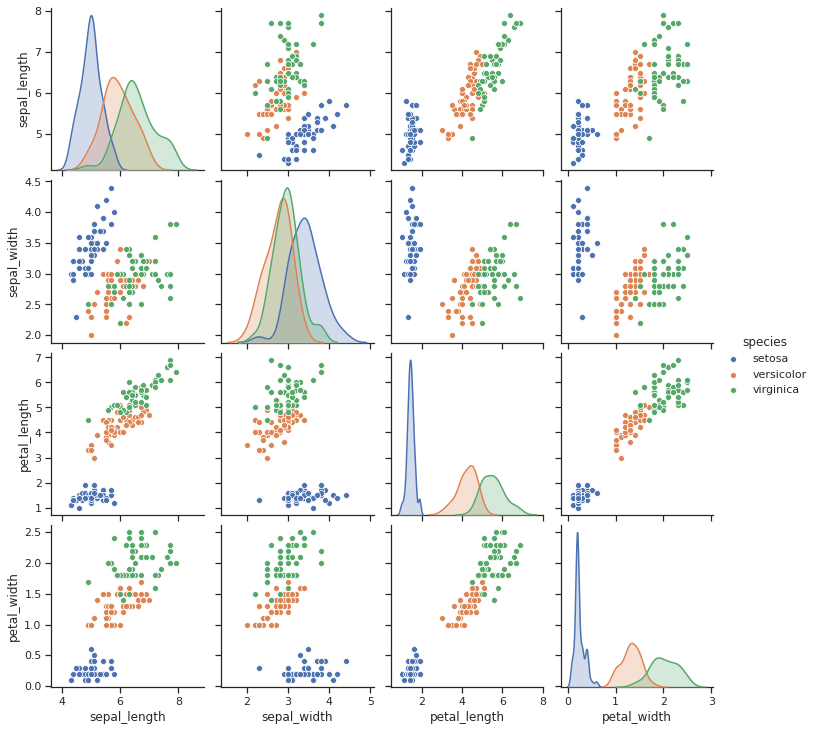

In [ ]:
# Características das observações
sns.set(style="ticks")
sns.pairplot(df, hue="species");

Na figura podemos ver as 4 características sendo analisadas em pares, através de gráficos de dispersão (através das coordenadas cartesianas para exibir valores de um conjunto de dados) e na diagonal principal histogramas (analisa a distribuição de frequências) de cada característica.

## Configruração dos gráficos

In [ ]:
# Configuraçõe dos gráficos
plt.rcParams['figure.figsize'] = (11,7)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['font.size'] = 20 
plt.rcParams['axes.titlesize'] = 20 

## Selecionar variáveis de entrada e saída

In [ ]:
X = df.drop(columns='species')
y = df.species

Para as variáveis de entrada vamos selecionar todas as caracteristicas da flor, ou seja, toda a nossa dimensionalidade (são os atributos dos dados), neste exemplo temos 4. E a nossa saída será a especie da flor.

## Definir dados de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

O tamanho do dos dados de teste foi de 70% para fins didáticos, devido ao fato do dataset de estudo e os dados treinados com mais do que isso deixa as avaliações quase sem erros. Essa divisão vai sempre depender de cada problema. 

## Modelo regressão logistica

In [ ]:
# Criando modelo e treinando com os dados de treino
clr = LogisticRegression()
clr.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_clr = clr.predict(X_test)

Aqui está a criação modelo de regressão linear, o treinamento e a predição do modelo.

## Avaliar regressão logistica

In [ ]:
# Principais métricas de performance
print(classification_report(y_test, resultado_clr))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.87      1.00      0.93        33
   virginica       1.00      0.88      0.93        40

    accuracy                           0.95       105
   macro avg       0.96      0.96      0.95       105
weighted avg       0.96      0.95      0.95       105



A função **classification_report()** disponível nas metricas do **scikit-learn** trás as principais metricas de performance para modelos de classificação.

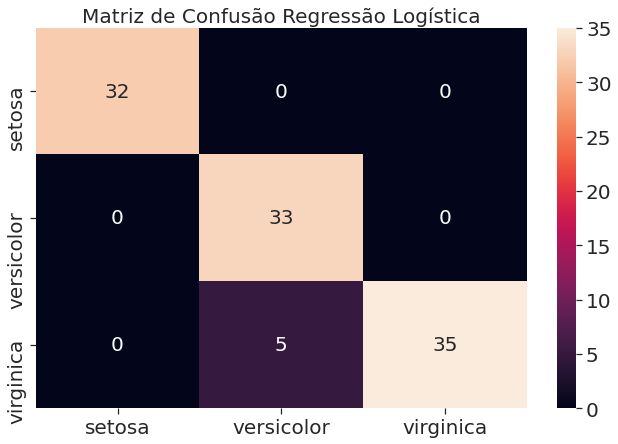

In [ ]:
# Gerando plot da matriz de confusão
labels = list(clr.classes_)
matriz = confusion_matrix(y_test, resultado_clr, labels=labels)
sns.heatmap(matriz, annot=True, xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão Regressão Logística')
plt.show()

Para completar a nossa avaliação a nossa matriz de confusão, uma forma visual para ver os erros e acertos do nosso classificador.

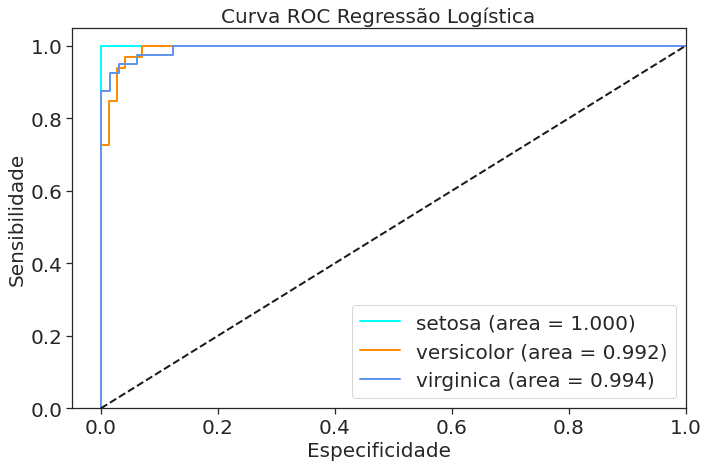

In [ ]:
# Definindo algumas variáveis para cálculo da curva ROC
y_score = clr.predict_proba(X_test)
y_test_roc = pd.get_dummies(y_test).values
n_classes = 3
lw = 2
# Calculando a curva ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Gerando a curva ROC para cada classe, com cores diferentes para cada classe
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color, classes in zip(range(n_classes), colors, clr.classes_):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='{0} (area = {1:0.3f})'.format(classes, roc_auc[i]))
# Configurações de eixos, legenda e título
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidade', fontsize=20)
plt.ylabel('Sensibilidade', fontsize=20)
plt.title('Curva ROC Regressão Logística')
plt.legend(loc="lower right", fontsize=20)
plt.show()

E a cereja do bolo, a curva ROC para finalizar a avaliação do nosso modelo, que podemos ver com todas as métricas até aqui está excelente. Mas não se engane o dataset para estudo os dados estão "quase perfeitos", muito diferente da vida real.

## Modelo KNN

In [ ]:
# Criando modelo e treinando com os dados de treino
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_knn = knn.predict(X_test)

Aqui está a criação modelo KNN, o treinamento e a predição do modelo.

## Avaliar KNN

In [ ]:
# Principais métricas de performance
print(classification_report(y_test, resultado_knn))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.94      0.95        33
   virginica       0.95      0.97      0.96        40

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



A função **classification_report()** disponível nas metricas do **scikit-learn** trás as principais metricas de performance para modelos de classificação.

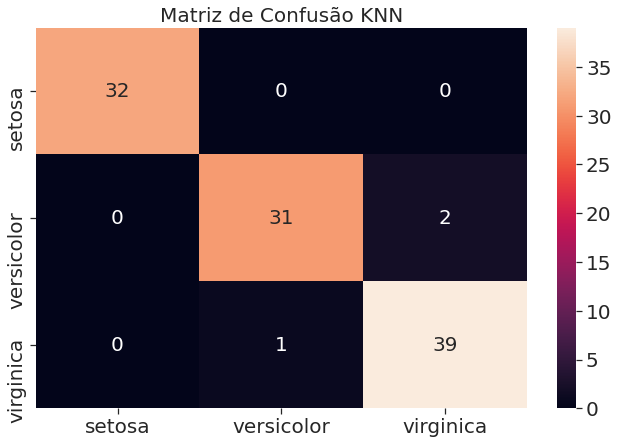

In [ ]:
# Gerando plot da matriz de confusão
labels = list(knn.classes_)
matriz = confusion_matrix(y_test, resultado_knn, labels=labels)
sns.heatmap(matriz, annot=True, xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão KNN')
plt.show()

Para completar a nossa avaliação a nossa matriz de confusão, uma forma visual para ver os erros e acertos do nosso classificador.

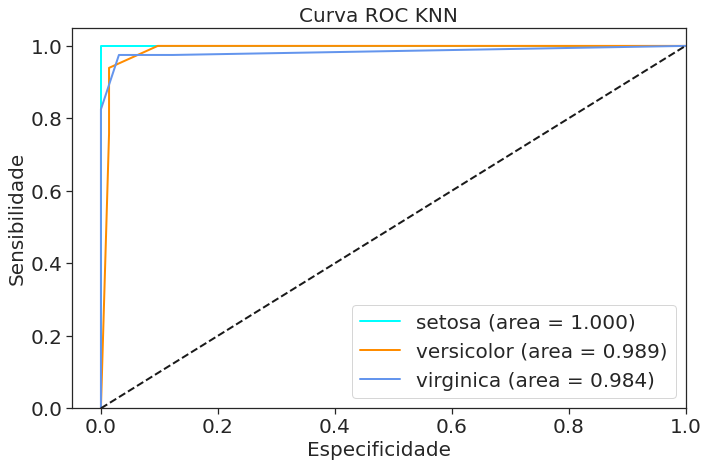

In [ ]:
# Definindo algumas variáveis para cálculo da curva ROC
y_score = knn.predict_proba(X_test)
y_test_roc = pd.get_dummies(y_test).values
n_classes = 3
lw = 2
# Calculando a curva ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Gerando a curva ROC para cada classe, com cores diferentes para cada classe
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color, classes in zip(range(n_classes), colors, knn.classes_):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='{0} (area = {1:0.3f})'.format(classes, roc_auc[i]))
# Configurações de eixos, legenda e título
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidade', fontsize=20)
plt.ylabel('Sensibilidade', fontsize=20)
plt.title('Curva ROC KNN')
plt.legend(loc="lower right", fontsize=20)
plt.show()

E a cereja do bolo, a curva ROC para finalizar a avaliação do nosso modelo, que podemos ver com todas as métricas até aqui e comparado aos outros modelos seria também uma boa opção. 

## Modelo árvore de decisão

In [ ]:
# Criando modelo e treinando com os dados de treino
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_dtc = dtc.predict(X_test)

Aqui está a criação modelo de árvore de decisão, o treinamento e a predição do modelo.

## Avaliar árvore de decisão

In [ ]:
# Principais métricas de performance
print(classification_report(y_test, resultado_dtc))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.74      0.97      0.84        33
   virginica       0.97      0.72      0.83        40

    accuracy                           0.89       105
   macro avg       0.90      0.90      0.89       105
weighted avg       0.91      0.89      0.89       105



A função **classification_report()** disponível nas metricas do **scikit-learn** trás as principais metricas de performance para modelos de classificação.

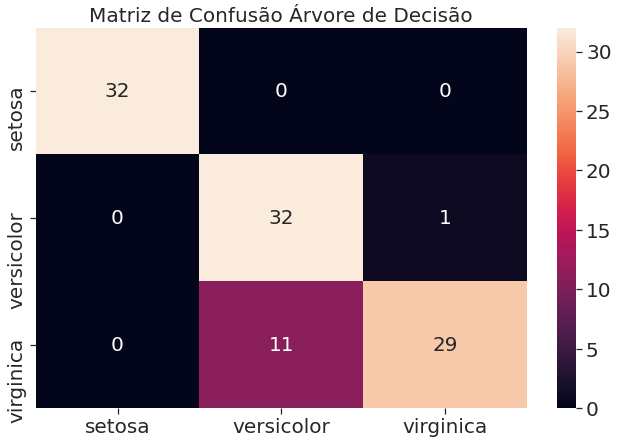

In [ ]:
# Gerando plot da matriz de confusão
labels = list(dtc.classes_)
matriz = confusion_matrix(y_test, resultado_dtc, labels=labels)
sns.heatmap(matriz, annot=True, xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão Árvore de Decisão')
plt.show()

Para completar a nossa avaliação a nossa matriz de confusão, uma forma visual para ver os erros e acertos do nosso classificador.

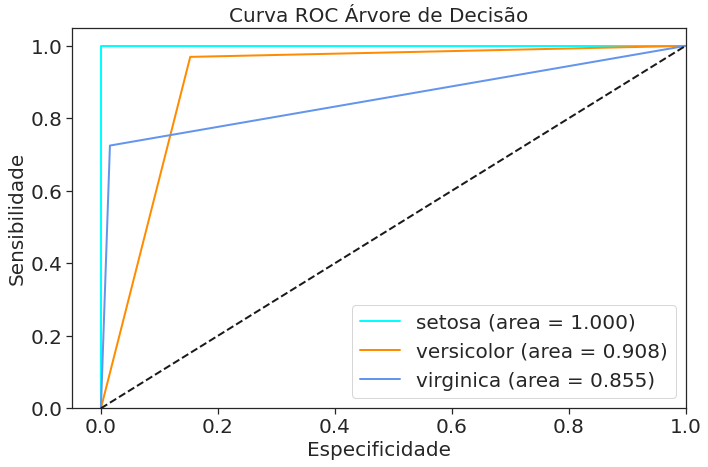

In [ ]:
# Definindo algumas variáveis para cálculo da curva ROC
y_score = dtc.predict_proba(X_test)
y_test_roc = pd.get_dummies(y_test).values
n_classes = 3
lw = 2
# Calculando a curva ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Gerando a curva ROC para cada classe, com cores diferentes para cada classe
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color, classes in zip(range(n_classes), colors, dtc.classes_):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='{0} (area = {1:0.3f})'.format(classes, roc_auc[i]))
# Configurações de eixos, legenda e título
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidade', fontsize=20)
plt.ylabel('Sensibilidade', fontsize=20)
plt.title('Curva ROC Árvore de Decisão')
plt.legend(loc="lower right", fontsize=20)
plt.show()

E a cereja do bolo, a curva ROC para finalizar a avaliação do nosso modelo, que podemos ver com todas as métricas até aqui e comparado aos outros modelos não foi o melhor algoritmo para este problema. 